# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import markers

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

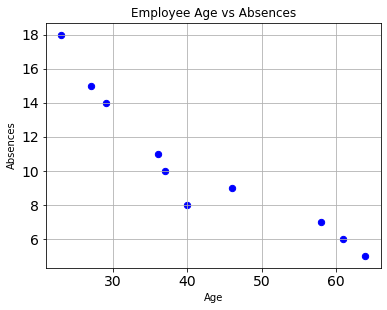

In [2]:
# your code here
employees = pd.read_csv('../data/absences.csv')
employees.plot.scatter(2,3,figsize=(6,4.5),title='Employee Age vs Absences',grid=True,fontsize=14,c='blue',s=40,marker='o')

In [3]:
# your comments here
# There is a clear negative correlation between Age and Absences. That is when Age increases, the number of absences decreases.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [4]:
# your code here
# my approach to this problem is the least square method solution to the problem A*x = b
# x is a vector with the unknows beta (slope) and alfa (intercept)
# A is a matrix containing  [ones x_i] in columns, and b is a vector containing all y_i values
# x_i and y_i are all values of two variables for i=1,...,n
# the least square problem solves x such that this minimizes the norm (A*x-b)
# in the linear regression problem this means the minimum error e_i = y_i - alfa - beta*x_i, summed for i=1,...,n
# the solution is shown in the equation below

<img src="https://render.githubusercontent.com/render/math?math=x=(A^{{{\mathrm  {T}}}}A)^{{-1}}A^{{{\mathrm  {T}}}}b" width="200">

In [5]:
# function lin_reg works with arrays X, Y as inputs
def lin_reg(X,Y):
    # build matrix A
    A = np.vstack((np.ones((len(X))),X)).T
    # solve the linear system
    alfa, beta = np.linalg.solve(np.matmul(A.T,A),np.matmul(A.T,Y))
    return alfa, beta

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [6]:
# your code here
X = employees.Age
Y = employees.Absences
alfa,beta = lin_reg(X,Y)
print(f"Linear regression 'Age vs Absence' slope: {round(beta,2)} and intersect: {round(alfa,2)}")
print(f"Linear correlation is negative and strong (coefficient: {round(np.corrcoef(X,Y)[0,1],2)}) ")
Y_est = alfa + X*beta

Linear regression 'Age vs Absence' slope: -0.27 and intersect: 21.59
Linear correlation is negative and strong (coefficient: -0.93) 


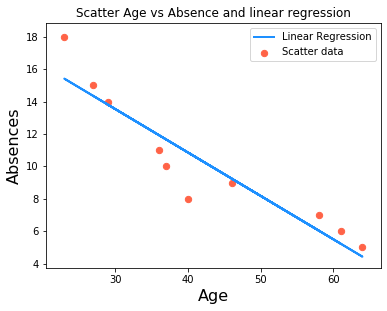

In [7]:
plt.figure(figsize=(6,4.5))
plt.plot(X, Y_est, 'dodgerblue', label='Linear Regression', linewidth=2)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Absences', fontsize=16)
plt.title('Scatter Age vs Absence and linear regression')
plt.scatter(X,Y, label='Scatter data', s = 40,color='tomato')
plt.legend()
plt.show()

In [8]:
# your comments here
# We confirm in the scatter data plot that linear correlation is negative and strong (coefficient: -0.93).

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [9]:
# your code here
# function get_covar with arrays X, Y as inputs
def get_covar(X,Y):
    return np.dot(X-X.mean(),Y-Y.mean())/(len(X)-1)

def get_corr(X,Y):
    return get_covar(X,Y)/(X.std()*Y.std())

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [10]:
# your code here
print(f"Covariance 'Age vs Absences' is {round(get_covar(X,Y),2)}")
print(f"Correlation coefficient 'Age vs Absences' is {round(get_corr(X,Y),2)}")

Covariance 'Age vs Absences' is -57.7
Correlation coefficient 'Age vs Absences' is -0.93


In [11]:
# your comments here
# Covariance main interpretation is given by its sign. Being this negative, it means that
# greater values of one variable mainly correspond to the lesser values of the other.
# The magnitude of the covariance doesnt' have a direct interpret because it is not normalized.
# Indeed, the correlation coefficient is the normalized version of the covariance.
# Thus, in our case it inherits the sign of the covariance.
# In addition, being in our case close to -1, this means that Age and Absences are strongly
# correlated in a linear decreasing relation.


#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [12]:
# your comments here
# We can conclude that age is a good indicator of absenteeism. In addition, having constructed its linear
# correlation, we can therefore make good predictions of absenteeism for any given age.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [13]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})
X = ironbeers_df.X
Y = ironbeers_df.Y

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [14]:
# your code here
print(f"Covariance 'X vs Y' is {round(get_covar(X,Y),2)}")
print(f"Correlation coefficient 'X vs Y' is {round(get_corr(X,Y),2)}")

Covariance 'X vs Y' is 12.0
Correlation coefficient 'X vs Y' is 0.98


In [15]:
# your comments here
# In the analysis above, we observe that the number of people told to stay for Ironbeers (or 'X')
# has a positive covariance against the number of people that finally join beers in Campus on Fridays (or 'Y').
# This means that greater values of people told to stay correspond with greater values of people that actually
# participate in Ironbeers (and the same holds for the lesser values).
# In addition, being the correlation coefficient very close to 1 (0.98), then the relation between the
# 'X' - people told to stay for Ironbeers - and 'Y' - people actually joining Ironbeers on Fridays -
# is PROPORTIONAL - or linear -.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

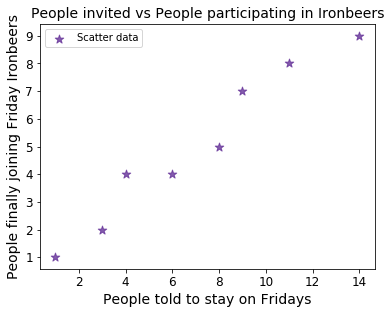

In [16]:
# your code here
plt.figure(figsize=(6,4.5))
plt.xlabel('People told to stay on Fridays', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('People finally joining Friday Ironbeers', fontsize=14)
plt.yticks(fontsize=12)
plt.title('People invited vs People participating in Ironbeers',fontsize=14)
plt.scatter(X,Y, label='Scatter data', s = 80,color='rebeccapurple',marker='*',alpha=0.8)
plt.legend()
plt.show()

In [17]:
# your comments here
# We confirm our prediction about the covariance and correlation coefficient between
# people told to stay and actually people staying for Ironbeers on Fridays.
# The strong positive linear correlation is observed from the scatter data, that is
# its behavior could be modelled properly with an increasing linear function
# that we'll determine in the next step.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [18]:
# your code here
alfa,beta = lin_reg(X,Y)
print(f"Linear regression 'X' vs 'Y' has a slope: {round(beta,2)} and intersect: {round(alfa,2)}.")

Linear regression 'X' vs 'Y' has a slope: 0.64 and intersect: 0.55.


In [19]:
# your comments here
# The slope of the regression line 'X' vs 'Y' is positive as expected from the correlation coefficient.
# Moreover, the intersect of the linear regression is close to zero which tells us that if you don't
# invite people to Ironbeers it is expected that no one will actually join. In addition, the slope (0.64)
# is less than one which makes sense, being that it is not possible that actually more
# people assist to Ironbeers than those invited. Finally, the slope of the linear regression also gives us
# the insight that actually 64% of the invited people to Ironbeers is expected to actually join in Campus
# on Fridays.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [20]:
# your comments here
# No! I can relax that I am not the problem, and we could try may be to buy more FREE BEERS !!!!!!!

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [21]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [22]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [23]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [24]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [25]:
# your code here

In [26]:
# your comments here